In [160]:
import pandas as pd 
residuals_df = pd.read_csv('../data/sample_residuals_10k.csv', index_col=0)
model_input_df = pd.read_csv('../data/model_input.csv')


In [161]:
print(residuals_df.describe())
print(residuals_df.info())

             actual     predicted         error     abs_error
count  1.000000e+04  1.000000e+04  1.000000e+04  1.000000e+04
mean   4.491069e+04  4.027263e+04  4.638068e+03  1.458109e+04
std    7.631185e+04  5.558975e+04  4.185966e+04  3.951096e+04
min    1.000000e+00  7.189717e+02 -5.254368e+05  1.769647e-01
25%    1.232840e+04  1.291454e+04 -4.574534e+03  1.884594e+03
50%    2.422062e+04  2.450847e+04 -1.346627e+02  5.237635e+03
75%    4.898450e+04  4.596429e+04  6.207281e+03  1.347012e+04
max    1.998305e+06  1.228735e+06  1.773507e+06  1.773507e+06
<class 'pandas.core.frame.DataFrame'>
Index: 10000 entries, 1985134 to 909011
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   actual     10000 non-null  float64
 1   predicted  10000 non-null  float64
 2   error      10000 non-null  float64
 3   abs_error  10000 non-null  float64
dtypes: float64(4)
memory usage: 390.6 KB
None


#### **Merge on Index:**

In [162]:
# Join residuals and feautres using index 
merged_df = model_input_df.loc[residuals_df.index].copy()

# Add error columns back in 
merged_df['actual'] = residuals_df['actual']
merged_df['predicted'] = residuals_df['predicted']
merged_df['error'] = residuals_df['error'] 
merged_df['abs_error'] = residuals_df['abs_error']

## Explore Patterns That Caused Huge Errors

#### **Top 10 Highest-Error Cases**:

In [163]:
merged_df.sort_values('abs_error', ascending=False).head(10)

,gender_encoded,age_group_encoded,severity_encoded,admission_encoded,payment_type_encoded,diagnosis_encoded,procedure_encoded,county_encoded,los,total_charges,actual,predicted,error,abs_error
703410,0,1,2,3,3,88,42,26,41,1977082.18,1977082.18,2.035756e+05,1.773507e+06,1.773507e+06
868656,0,4,3,3,0,112,81,55,30,1252397.19,1252397.19,1.429414e+05,1.109456e+06,1.109456e+06
1229955,1,3,4,3,2,138,213,41,118,1998305.15,1998305.15,1.228735e+06,7.695700e+05,7.695700e+05
111248,0,3,4,2,0,8,137,29,39,1062891.97,1062891.97,3.791441e+05,6.837479e+05,6.837479e+05
1656008,1,3,4,2,2,199,213,26,56,1168526.27,1168526.27,5.297268e+05,6.387995e+05,6.387995e+05
2205242,1,3,3,1,3,249,206,26,10,735079.95,735079.95,1.346995e+05,6.003805e+05,6.003805e+05
991111,1,0,4,3,1,132,213,22,58,969419.00,969419.00,4.372956e+05,5.321234e+05,5.321234e+05
1698680,0,0,4,1,1,202,66,55,54,217651.85,217651.85,7.430887e+05,-5.254368e+05,5.254368e+05
1639782,1,1,4,3,3,196,15,3,42,823033.36,823033.36,3.013916e+05,5.216418e+05,5.216418e+05
523969,1,2,4,3,2,67,179,3,39,709692.77,709692.77,1.987790e+05,5.109138e+05,5.109138e+05


#### **Summary Stats  for Length of Stay (LOS) on Worst Predictions:**

In [164]:
merged_df['los'].describe()

count    10000.000000
mean         5.263500
std          7.084284
min          1.000000
25%          2.000000
50%          3.000000
75%          6.000000
max        118.000000
Name: los, dtype: float64

#### **Count How Often Each Diagnosis Appears in the Worst Residuals:**

In [165]:
merged_df['diagnosis_encoded'].value_counts()

# Frequency of all diagnosis codes
model_input_df["diagnosis_encoded"].value_counts().head(10)

diagnosis_encoded
137    224342
241    110942
167     67235
150     54134
12      50444
67      49629
221     45668
177     42980
238     42117
56      42097
Name: count, dtype: int64

In [166]:
top1000 = merged_df.sort_values("abs_error", ascending=False).head(1000)
top1000_hernia_rate = (top1000["diagnosis_encoded"] == 1).mean()
full_hernia_rate = (model_input_df["diagnosis_encoded"] == 1).mean()
print("Top 1000 Hernia %:", top1000_hernia_rate)
print("Full Dataset Hernia %:", full_hernia_rate)

Top 1000 Hernia %: 0.008
Full Dataset Hernia %: 0.005214058697770797


## Abdomial Hernia

####  **Plot the Distribution of Errors:**

In [167]:
# Filter from merged_df instead of model_input_df
hernia_cases = merged_df[merged_df["diagnosis_encoded"] == 1]
non_hernia_cases = merged_df[merged_df["diagnosis_encoded"] != 1]

# Compare average absolute error
print("Hernia mean abs error:", hernia_cases["abs_error"].mean())
print("Non-hernia mean abs error:", non_hernia_cases["abs_error"].mean())

Hernia mean abs error: 15038.96842516839
Non-hernia mean abs error: 14578.599182743645


In [168]:
print(non_hernia_cases.shape)
print(non_hernia_cases["abs_error"].isna().sum())

(9946, 14)
0


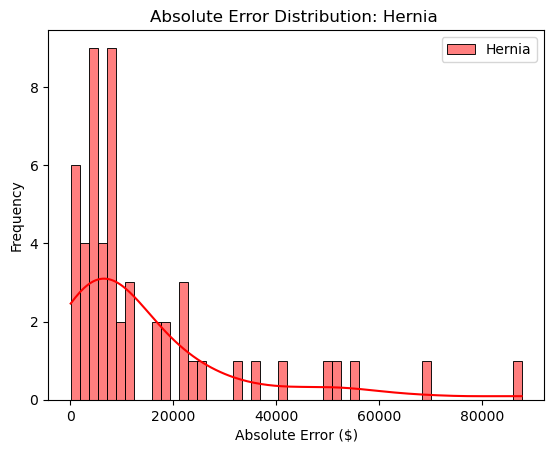

In [169]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.histplot(hernia_cases["abs_error"], bins=50, kde=True, color='red', label='Hernia')
plt.legend()
plt.title("Absolute Error Distribution: Hernia ")
plt.xlabel("Absolute Error ($)")
plt.ylabel("Frequency")
plt.show()

In [170]:
merged_df['diagnosis_encoded'].value_counts(normalize=True).head(10)

diagnosis_encoded
137    0.0998
241    0.0478
167    0.0251
150    0.0229
12     0.0228
221    0.0214
67     0.0207
238    0.0206
56     0.0183
177    0.0177
Name: proportion, dtype: float64

#### ****Identify Most Common Diagnoses in Top 1000 Errors:****

In [ ]:
top_1000 = merged_df.sort_values(by='abs_error', ascending=False).head(1000)
top1000['diagnosis_encoded'].value_counts(normalize=True).head(10)

diagnosis_encoded
241    0.087
8      0.039
7      0.037
249    0.034
63     0.033
112    0.032
137    0.031
69     0.030
56     0.029
238    0.028
Name: proportion, dtype: float64

In [172]:
# Compare to full dataset
model_input_df['diagnosis_encoded'].value_counts(normalize=True).head(10)

diagnosis_encoded
137    0.095809
241    0.047380
167    0.028714
150    0.023119
12     0.021543
67     0.021195
221    0.019503
177    0.018355
238    0.017987
56     0.017978
Name: proportion, dtype: float64